In [15]:
%pip install pandas
%pip install matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import des modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Travail sur les données financières

In [3]:
# Lecture du csv en df
csv_path = "/Users/jerry/Documents/Data Scientest/Project OPA/nov24_cds_opa/notebooks/csv/nasdaq100_fundamentals_fpm.csv"
df = pd.read_csv(csv_path)
df.head()

,symbol,date,calendarYear,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,ADBE,2024-11-29,2024,FY,48.109620,12.438479,18.022371,17.503356,17.642058,31.554810,...,337500000.0,0.0,35.167635,55.879983,0.0,10.378861,6.531856,0.0,0.394186,0.519016
1,ADBE,2023-12-01,2023,FY,42.470460,11.877462,15.978118,15.190372,17.159737,36.144420,...,346500000.0,0.0,41.823896,48.687341,0.0,8.727068,7.496815,0.0,0.328611,0.787746
2,ADBE,2022-12-02,2022,FY,37.459574,10.119149,16.676596,15.736170,12.970213,29.895745,...,345500000.0,0.0,42.810690,63.896074,0.0,8.525908,5.712401,0.0,0.338481,0.940426
3,ADBE,2021-12-03,2021,FY,33.092243,10.109015,15.142558,14.450734,12.155136,31.020964,...,309000000.0,0.0,43.425404,61.061662,0.0,8.405218,5.977564,0.0,0.325877,0.691824
4,ADBE,2020-11-27,2020,FY,26.752599,10.935551,11.906445,11.035343,12.457380,27.575884,...,257500000.0,0.0,39.654181,64.860627,0.0,9.204578,5.627451,0.0,0.396562,0.871102


In [4]:
df['period'].unique()

array(['FY'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   symbol                                  504 non-null    object 
 1   date                                    504 non-null    object 
 2   calendarYear                            504 non-null    int64  
 3   period                                  504 non-null    object 
 4   revenuePerShare                         504 non-null    float64
 5   netIncomePerShare                       504 non-null    float64
 6   operatingCashFlowPerShare               504 non-null    float64
 7   freeCashFlowPerShare                    504 non-null    float64
 8   cashPerShare                            499 non-null    float64
 9   bookValuePerShare                       499 non-null    float64
 10  tangibleBookValuePerShare               499 non-null    float6

In [19]:
display(df.columns)

Index(['symbol', 'date', 'calendarYear', 'period', 'revenuePerShare',
       'netIncomePerShare', 'operatingCashFlowPerShare',
       'freeCashFlowPerShare', 'cashPerShare', 'bookValuePerShare',
       'tangibleBookValuePerShare', 'shareholdersEquityPerShare',
       'interestDebtPerShare', 'marketCap', 'enterpriseValue', 'peRatio',
       'priceToSalesRatio', 'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio',
       'evToSales', 'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'gr

Data Cleaning

In [20]:
# Nombre de lignes non-complètes
print("Nombre d'entrées' avec des NaN: ", df[df.isna().any(axis=1)].shape[0])

# Pourcentage de données manquantes pour chaque variable
(df.isna().sum()[df.isna().sum() > 0] / 504 * 100).map(lambda x: f"{x:.2f}%")

Nombre d'entrées' avec des NaN:  90


cashPerShare                   0.99%
bookValuePerShare              0.99%
tangibleBookValuePerShare      0.99%
shareholdersEquityPerShare     0.99%
interestDebtPerShare           0.99%
enterpriseValue                0.99%
evToSales                      0.99%
enterpriseValueOverEBITDA      0.99%
evToOperatingCashFlow          0.99%
evToFreeCashFlow               0.99%
netDebtToEBITDA                0.99%
grahamNumber                  17.46%
grahamNetNet                   0.99%
workingCapital                 0.99%
tangibleAssetValue             0.99%
netCurrentAssetValue           0.99%
investedCapital                0.99%
averageReceivables             1.19%
averagePayables                1.19%
averageInventory               1.19%
daysSalesOutstanding           0.99%
daysPayablesOutstanding        0.79%
daysOfInventoryOnHand          0.79%
inventoryTurnover              0.20%
dtype: object

In [21]:
df = df.drop_duplicates()
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 498
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   symbol                                  414 non-null    object        
 1   date                                    414 non-null    datetime64[ns]
 2   calendarYear                            414 non-null    int64         
 3   period                                  414 non-null    object        
 4   revenuePerShare                         414 non-null    float64       
 5   netIncomePerShare                       414 non-null    float64       
 6   operatingCashFlowPerShare               414 non-null    float64       
 7   freeCashFlowPerShare                    414 non-null    float64       
 8   cashPerShare                            414 non-null    float64       
 9   bookValuePerShare                       414 non-null    flo

In [22]:
# Supression de du ticker GOOGL, le droit de vote n'étant pas pertinent pour ce projet
df = df[df["symbol"] != "GOOGL"]

In [23]:
# Création d'une colonne quarter (trimestre)
df['quarter'] = df['date'].dt.quarter

In [24]:
# Récupération du top 10 (symbols) au 4T24
top10_4T24 = df[(df['calendarYear'] == 2024) & (df['quarter'] == 4)].sort_values(by='marketCap', ascending=False).head(10)
display(top10_4T24)
top10Tickers = top10_4T24['symbol']

,symbol,date,calendarYear,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,...,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,quarter
20,GOOG,2024-12-31,2024,FY,28.120669,8.043544,10.066602,5.845906,7.685144,26.117456,...,0.000000e+00,54.580336,19.925738,0.000000,6.687390,18.318017,0.000000,0.307976,4.220695,4
25,AMZN,2024-12-31,2024,FY,60.914638,5.657214,11.064356,3.139311,9.663134,27.305452,...,3.376600e+10,31.725573,102.431517,37.139471,11.504914,3.563356,9.827819,0.207183,7.925045,4
314,META,2024-12-31,2024,FY,64.917522,24.609313,36.041042,21.338595,30.708366,72.074586,...,0.000000e+00,37.706822,93.025928,0.000000,9.679946,3.923637,0.000000,0.341442,14.702447,4
459,TSLA,2024-12-31,2024,FY,30.404606,2.206972,4.644569,1.135387,11.379707,22.931839,...,1.282150e+10,16.507012,56.742398,54.663572,22.111815,6.432580,6.677207,0.097253,3.530968,4
114,AVGO,2024-11-03,2024,FY,11.153547,1.274870,4.317042,4.198529,2.021626,14.636246,...,1.829000e+09,31.252957,31.819040,33.695253,11.678895,11.471119,10.832386,0.087104,0.118512,4
354,NFLX,2024-12-31,2024,FY,90.801492,20.282295,17.138623,16.115296,22.312724,57.607619,...,0.000000e+00,18.608025,15.612679,0.000000,19.615193,23.378435,0.000000,0.352077,1.023326,4
69,ASML,2024-12-31,2024,FY,71.860920,19.251462,28.391050,23.135011,32.395881,46.978897,...,1.021705e+10,66.694129,0.000000,288.681023,5.472746,0.000000,1.264371,0.409790,5.256039,4
454,TMUS,2024-12-31,2024,FY,69.620529,9.698123,19.066959,8.537495,4.626258,52.806401,...,1.642500e+09,19.173710,0.000000,0.000000,19.036483,0.000000,0.000000,0.183654,10.529463,4
0,ADBE,2024-11-29,2024,FY,48.109620,12.438479,18.022371,17.503356,17.642058,31.554810,...,0.000000e+00,35.167635,55.879983,0.000000,10.378861,6.531856,0.000000,0.394186,0.519016,4
414,PEP,2024-12-28,2024,FY,66.900218,6.975965,9.109250,5.235980,6.748725,13.234523,...,2.667000e+09,41.060215,96.155256,0.000000,8.889384,3.795944,0.000000,0.530902,3.873270,4


Graphs

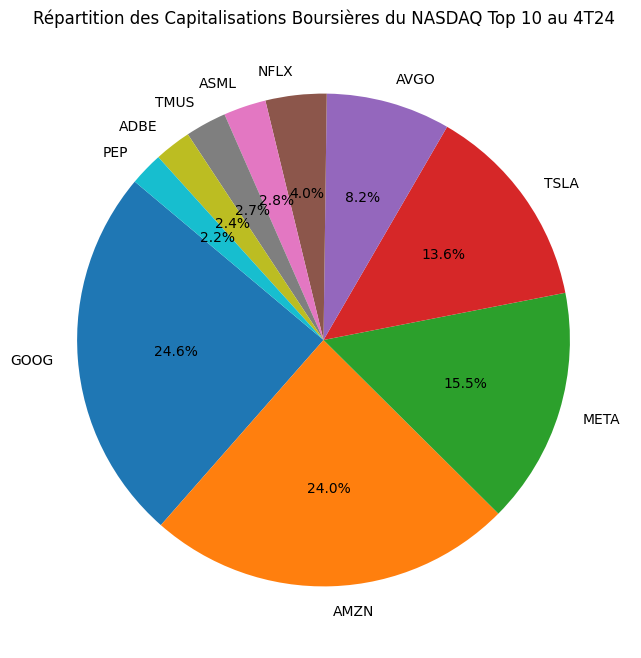

In [25]:
# Camembert des capitalisations du Top 10 au 4T24
plt.figure(figsize=(8, 8))
plt.pie(top10_4T24["marketCap"], labels=top10_4T24["symbol"], autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Capitalisations Boursières du NASDAQ Top 10 au 4T24")
plt.show()

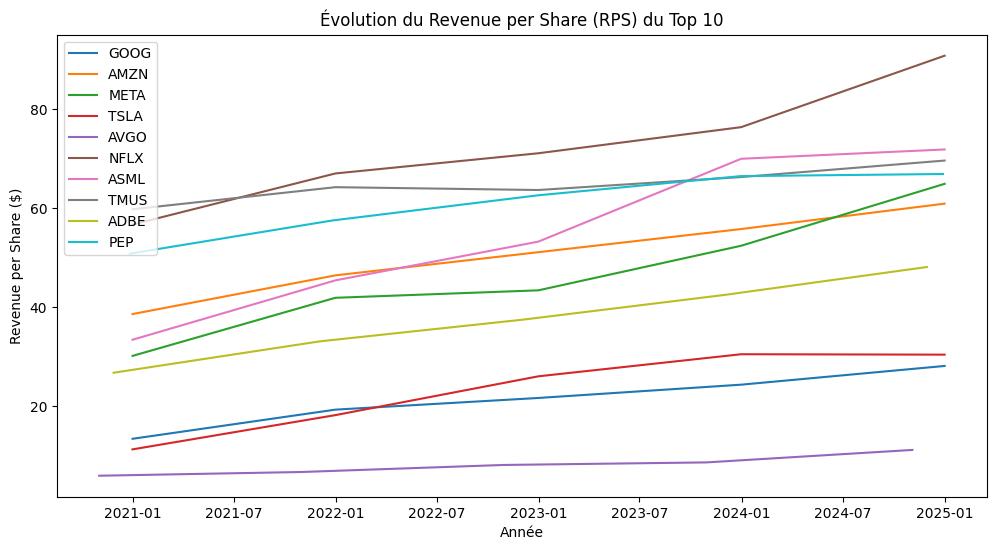

In [26]:
# Evolution du RPS pour le top10
plt.figure(figsize=(12, 6))

for ticker in top10Tickers.values:
    df_ticker = df[df["symbol"] == ticker]
    plt.plot(df_ticker["date"], df_ticker["revenuePerShare"], label=ticker)

plt.title("Évolution du Revenue per Share (RPS) du Top 10")
plt.xlabel("Année")
plt.ylabel("Revenue per Share ($)")
plt.legend()
#plt.grid(True)
plt.show()

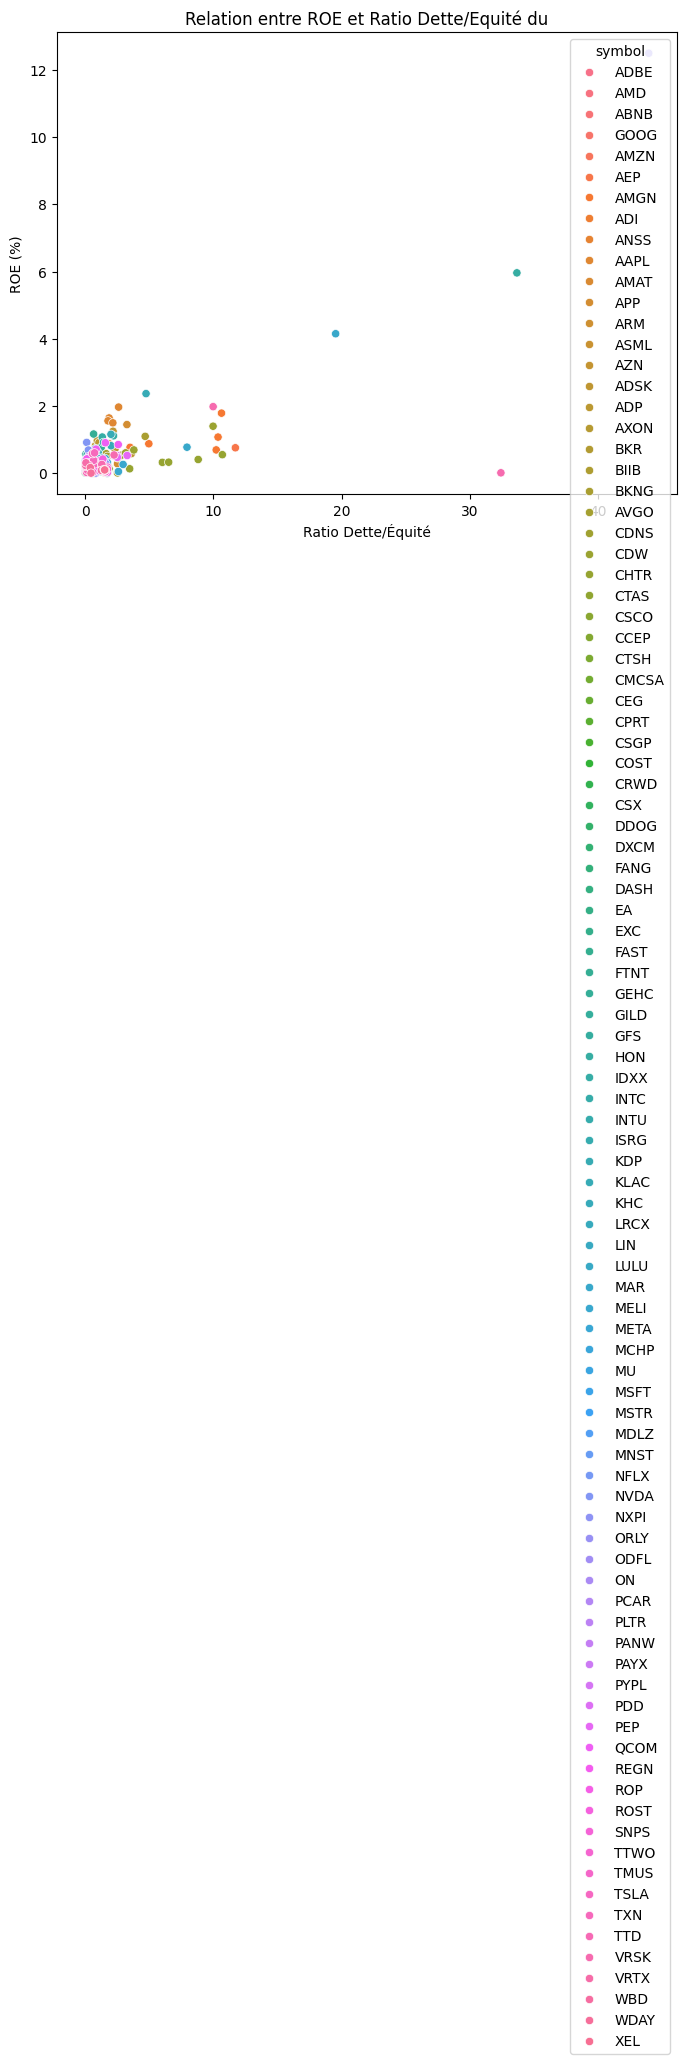

Corrélation Pearson entre ROE et Debt/Equity :
              debtToEquity      roe
debtToEquity       1.00000  0.78183
roe                0.78183  1.00000


In [27]:
# Matrice de corrélation entre ROE et Debt/Equity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['debtToEquity'], y=df['roe'], hue=df['symbol'])
plt.title("Relation entre ROE et Ratio Dette/Equité du")
plt.xlabel("Ratio Dette/Équité")
plt.ylabel("ROE (%)")
plt.show()

# Calcul du coefficient de corrélation
correlation = df[['debtToEquity', 'roe']].corr()
print("Corrélation Pearson entre ROE et Debt/Equity :")
print(correlation)

# Travail sur les données boursières

In [28]:
# Import des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
ohlc = pd.read_csv('/Users/jerry/Documents/Data Scientest/Project OPA/nov24_cds_opa/notebooks/csv/historical_ohlc_nasdaq100.csv')
display(ohlc.head())
ohlc.info()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
0,2020-01-02,330.00,334.48,329.170,334.43,334.429993,1990496,1990100,4.43,1.34000,332.94,"January 02, 20",0.013400,ADBE
1,2020-01-03,329.17,332.98,328.690,331.81,331.809998,1579371,1577600,2.64,0.80202,331.84,"January 03, 20",0.008020,ADBE
2,2020-01-06,328.29,333.91,328.200,333.71,333.709991,1875122,1874700,5.42,1.65000,332.42,"January 06, 20",0.016500,ADBE
3,2020-01-07,334.15,334.79,332.305,333.39,333.390000,2507261,2500800,-0.76,-0.22744,333.80,"January 07, 20",-0.002274,ADBE
4,2020-01-08,333.81,339.23,333.410,337.87,337.869995,2248531,2248500,4.06,1.22000,337.20,"January 08, 20",0.012200,ADBE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123419 entries, 0 to 123418
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              123419 non-null  object 
 1   open              123419 non-null  float64
 2   high              123419 non-null  float64
 3   low               123419 non-null  float64
 4   close             123419 non-null  float64
 5   adjClose          123419 non-null  float64
 6   volume            123419 non-null  int64  
 7   unadjustedVolume  123419 non-null  int64  
 8   change            123419 non-null  float64
 9   changePercent     123419 non-null  float64
 10  vwap              123419 non-null  float64
 11  label             123419 non-null  object 
 12  changeOverTime    123419 non-null  float64
 13  symbol            123419 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 13.2+ MB


In [30]:
print(ohlc['symbol'].unique())
print(np.size(ohlc['symbol'].unique()))


['ADBE' 'AMD' 'ABNB' 'GOOGL' 'GOOG' 'AMZN' 'AEP' 'AMGN' 'ADI' 'ANSS'
 'AAPL' 'AMAT' 'APP' 'ARM' 'ASML' 'AZN' 'TEAM' 'ADSK' 'ADP' 'AXON' 'BKR'
 'BIIB' 'BKNG' 'AVGO' 'CDNS' 'CDW' 'CHTR' 'CTAS' 'CSCO' 'CCEP' 'CTSH'
 'CMCSA' 'CEG' 'CPRT' 'CSGP' 'COST' 'CRWD' 'CSX' 'DDOG' 'DXCM' 'FANG'
 'DASH' 'EA' 'EXC' 'FAST' 'FTNT' 'GEHC' 'GILD' 'GFS' 'HON' 'IDXX' 'INTC'
 'INTU' 'ISRG' 'KDP' 'KLAC' 'KHC' 'LRCX' 'LIN' 'LULU' 'MAR' 'MRVL' 'MELI'
 'META' 'MCHP' 'MU' 'MSFT' 'MSTR' 'MDLZ' 'MDB' 'MNST' 'NFLX' 'NVDA' 'NXPI'
 'ORLY' 'ODFL' 'ON' 'PCAR' 'PLTR' 'PANW' 'PAYX' 'PYPL' 'PDD' 'PEP' 'QCOM'
 'REGN' 'ROP' 'ROST' 'SBUX' 'SNPS' 'TTWO' 'TMUS' 'TSLA' 'TXN' 'TTD' 'VRSK'
 'VRTX' 'WBD' 'WDAY' 'XEL' 'ZS']
101


In [31]:
ohlc['date'] = pd.to_datetime(ohlc['date'])
ohlc = ohlc[ohlc["symbol"] != "GOOGL"]



Indicateurs intéressants à générer

In [32]:
ohlc["daily_return"] = ohlc.groupby("symbol")["close"].pct_change()

# Volatilité glissante sur 20 jours
ohlc["volatility_20d"] = ohlc.groupby("symbol")["daily_return"].transform(lambda x: x.rolling(20).std())

# Momentum sur 5 jours (variation relative du prix de l'actif sur 5 jour)
ohlc["momentum_5d"] = ohlc.groupby("symbol")["close"].transform(lambda x: (x - x.shift(5)) / x.shift(5))

# Range journalier (intensité du mouvement)
ohlc["range"] = ohlc["high"] - ohlc["low"]

Merge des deux datagrames

In [33]:
# Fusion sur symbol + date (ou ajuster à la granularité réelle de df : par trimestre, année…)
ohlc["date"] = pd.to_datetime(ohlc["date"])
df["date"] = pd.to_datetime(df["date"])

merged = ohlc.merge(df, on=["symbol", "date"], how="left")
merged_top10_4T24 = ohlc.merge(top10_4T24, on=["symbol", "date"], how="left")


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

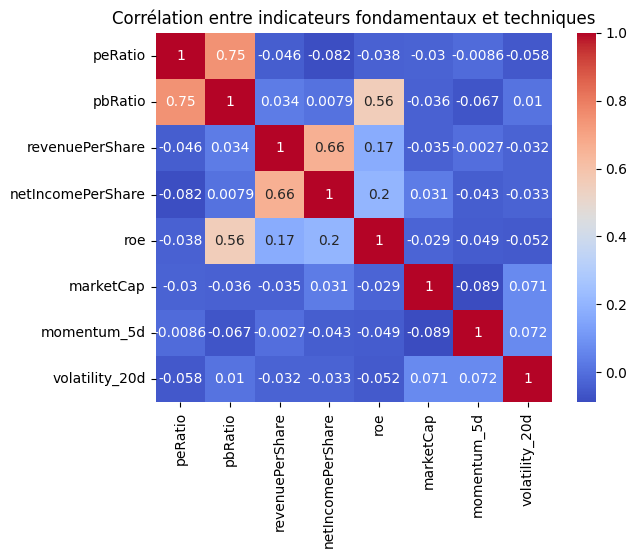

In [35]:
# Heatmap de corrélation fondamentaux vs techniques
features = ["peRatio", "pbRatio", "revenuePerShare", "netIncomePerShare",  "roe", "marketCap", "momentum_5d", "volatility_20d"]
sns.heatmap(merged[features].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre indicateurs fondamentaux et techniques")
plt.show()


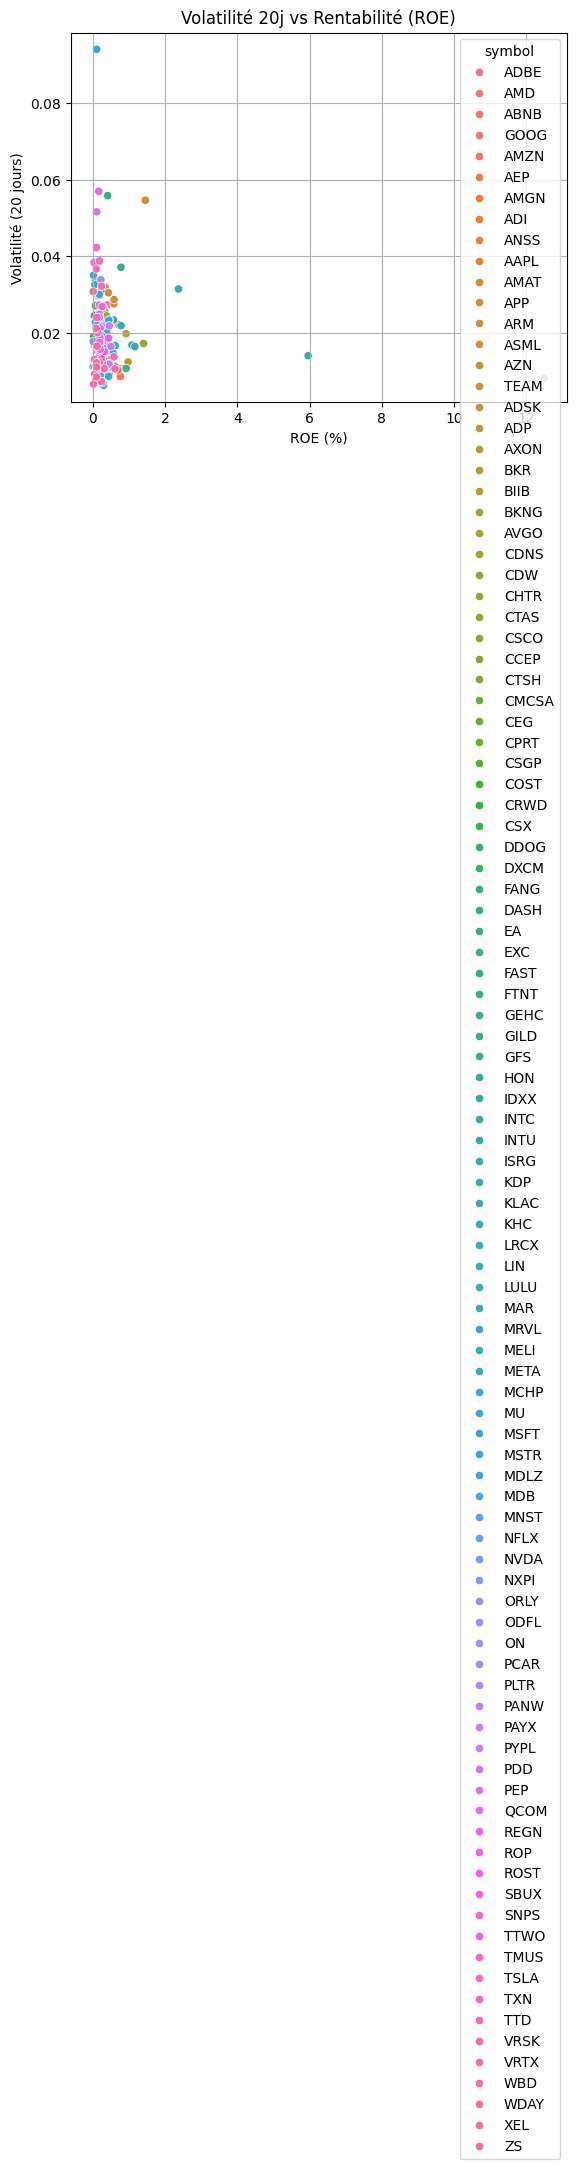

In [36]:
sns.scatterplot(data=merged, x="roe", y="volatility_20d", hue="symbol")
plt.title("Volatilité 20j vs Rentabilité (ROE)")
plt.xlabel("ROE (%)")
plt.ylabel("Volatilité (20 jours)")
plt.grid(True)
plt.show()

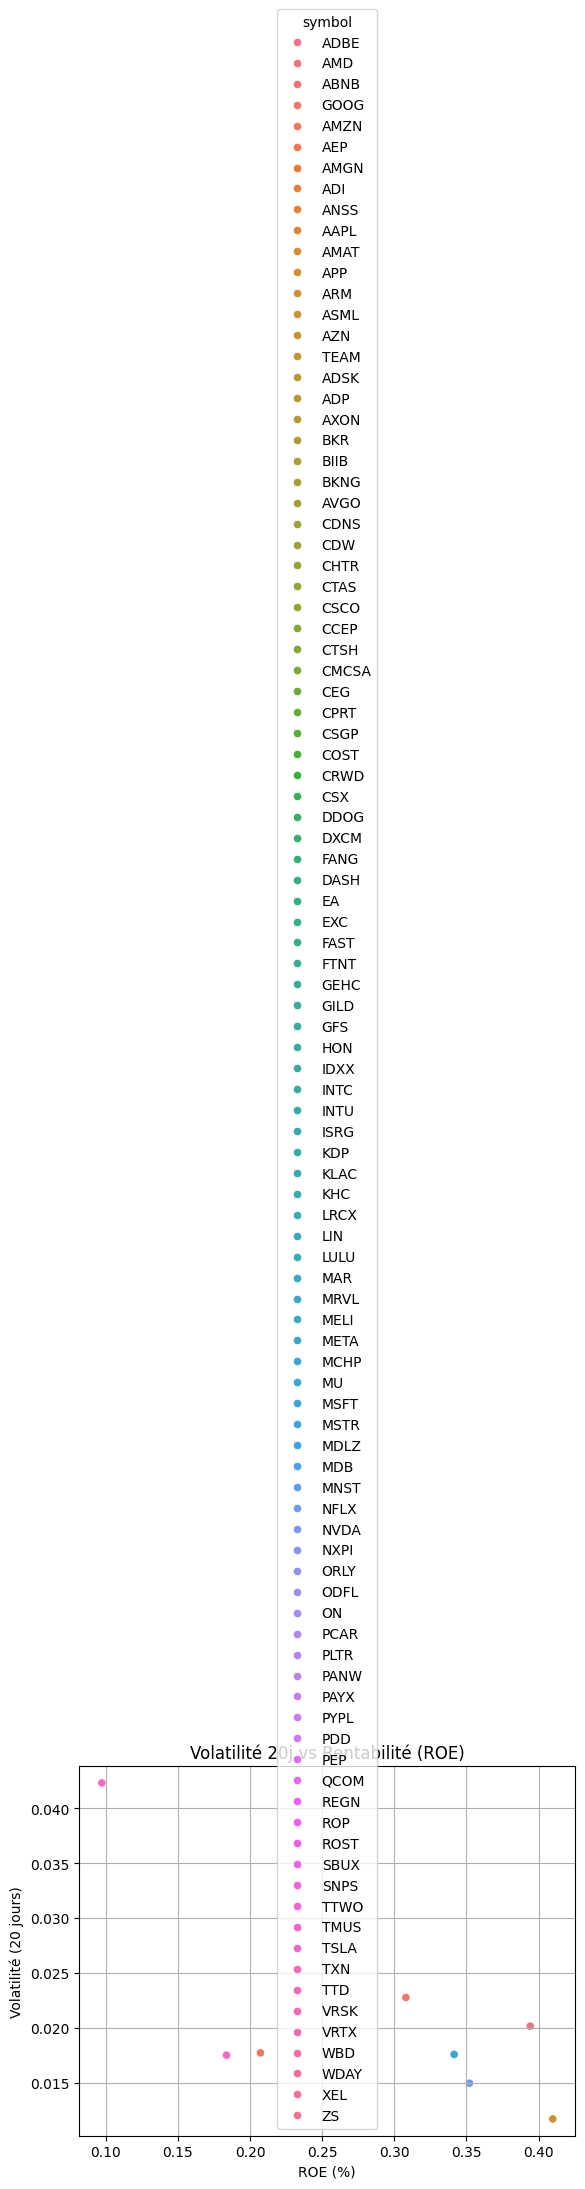

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=merged_top10_4T24, x="roe", y="volatility_20d", hue="symbol")
plt.title("Volatilité 20j vs Rentabilité (ROE)")
plt.xlabel("ROE (%)")
plt.ylabel("Volatilité (20 jours)")
plt.grid(True)
plt.show()

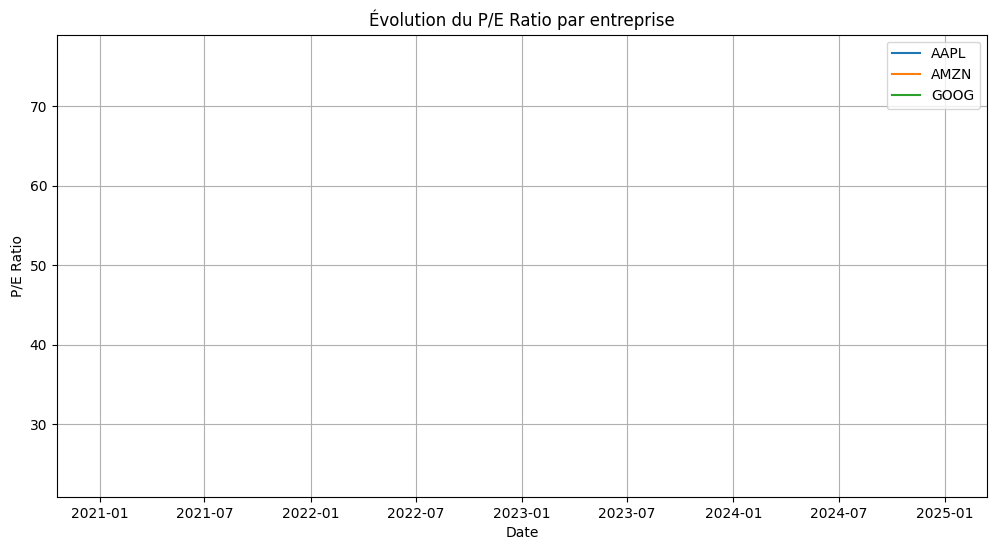

In [38]:
tickers = ["AAPL", "AMZN", "GOOG"]

plt.figure(figsize=(12, 6))
for symbol in tickers:
    sub = merged[merged["symbol"] == symbol]
    plt.plot(sub["date"], sub["peRatio"], label=symbol)

plt.title("Évolution du P/E Ratio par entreprise")
plt.xlabel("Date")
plt.ylabel("P/E Ratio")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
print(merged.columns)

NameError: name 'merged' is not defined

In [2]:
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/jerry/Library/Python/3.12/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Users/jerry/Library/Python/3.12/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
